In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf


# Common imports
import pandas as pd
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


/Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [3]:
np.random.seed(42)

In [4]:
from tensorflow import keras

In [5]:
Df = pd.read_csv("/Users/mac/Downloads/Train.csv")

In [6]:
Df.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [11]:
# 2014
Df4 = Df.iloc[:,4:11]

# 2015
Df5 = Df.iloc[:,11:21]
# 2019 
Df9 = Df.iloc[:,21:38]

# elevation and LC_Type1_mode
elT = Df[["elevation","LC_Type1_mode"]]

<Figure size 360x360 with 0 Axes>

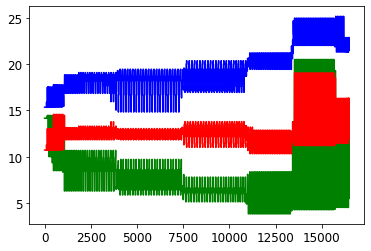

<Figure size 360x360 with 0 Axes>

In [12]:
plt.plot(Df4.mean(1),color = 'green')
plt.plot(Df5.mean(1), color = 'blue')
plt.plot(Df9.mean(1), color = 'red')
plt.figure(figsize=(5,5))

In [13]:
df = pd.concat([Df['Square_ID'],Df4 , Df5,elT],axis=1)


In [14]:
X = df.drop('Square_ID',axis=1)
y = Df['target_2015']

In [15]:
X.head()

,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,elevation,LC_Type1_mode
0,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,887.764222,9
1,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,743.403912,9
2,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,565.728343,9
3,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,443.392774,10
4,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,437.443428,10


In [16]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target_2015, dtype: float64

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
X_train.shape

(9879, 19)

In [19]:
X_test.shape

(3294, 19)

In [20]:
X_valid.shape

(3293, 19)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [22]:
X_train.shape[1:]

(19,)

In [23]:
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(9, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


W0402 01:21:56.820163 4436665792 deprecation.py:506] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
np.random.seed(42)

In [25]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Train on 9879 samples, validate on 3293 samples
Epoch 1/20
9879/9879 [==============================] - 1s 64us/sample - loss: 0.2513 - val_loss: 0.2308
Epoch 2/20
9879/9879 [==============================] - 0s 45us/sample - loss: 0.2147 - val_loss: 0.1982
Epoch 3/20
9879/9879 [==============================] - 0s 44us/sample - loss: 0.1860 - val_loss: 0.1725
Epoch 4/20
9879/9879 [==============================] - 0s 44us/sample - loss: 0.1632 - val_loss: 0.1521
Epoch 5/20
9879/9879 [==============================] - 0s 43us/sample - loss: 0.1451 - val_loss: 0.1358
Epoch 6/20
9879/9879 [==============================] - 0s 44us/sample - loss: 0.1306 - val_loss: 0.1226
Epoch 7/20
9879/9879 [==============================] - 0s 46us/sample - loss: 0.1188 - val_loss: 0.1118
Epoch 8/20
9879/9879 [==============================] - 0s 46us/sample - loss: 0.1090 - val_loss: 0.1028
Epoch 9/20
9879/9879 [==============================] - 0s 45us/sample - loss: 0.1008 - val_loss: 0.0954
Epoch 1

In [26]:
mse_test

0.0629942854091697

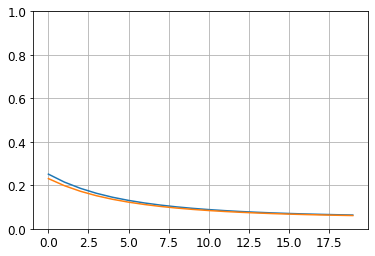

In [27]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
X_new = X_test
model.predict(X_new)

array([[0.13919196],
       [0.2001625 ],
       [0.13319358],
       ...,
       [0.07904427],
       [0.09334394],
       [0.22915694]], dtype=float32)

In [30]:
model.predict(X_test).max()

0.46495885

In [31]:
model.predict(X_test).min()

0.014155358

In [32]:
y.max()

1.0

In [33]:
y.min()

0.0

In [34]:
model.predict(X_new)

array([[0.13919196],
       [0.2001625 ],
       [0.13319358],
       ...,
       [0.07904427],
       [0.09334394],
       [0.22915694]], dtype=float32)

In [35]:
model.predict(X_new).max()

0.46495885

In [36]:
model.predict(X_new).min()

0.014155358

In [ ]:
#le derniere column du Df9 et elT

In [39]:
df2019 = pd.concat([Df9.iloc[:,-17:],elT],axis=1)
res=model.predict(df2019)

In [40]:
res.min()

0.0

In [41]:
res.max()

0.9612608

In [42]:
res

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)